In [11]:
import pandas as pd
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

df = pd.read_csv(r'C:\Users\91956\OneDrive\Desktop\Ekart_Recommendtor\data\OnlineRetail.csv',encoding="ISO-8859-1")

df = df.dropna(subset=['InvoiceNo','Description'])
df = df[df['Quantity']>0]

transcations =(df.groupby("InvoiceNo")["Description"].apply(list).values.tolist())

print(f"Total transcations: {len(transcations)}")



te = TransactionEncoder()
te_array = te.fit(transcations).transform(transcations)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)

Total transcations: 20136


In [6]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

In [7]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [8]:


print(rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10))

                       antecedents                           consequents  \
0         (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)   
1         (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)   
2         (HAND WARMER UNION JACK)       (HAND WARMER SCOTTY DOG DESIGN)   
3  (HAND WARMER SCOTTY DOG DESIGN)              (HAND WARMER UNION JACK)   
4  (ASSORTED COLOUR BIRD ORNAMENT)  (WHITE HANGING HEART T-LIGHT HOLDER)   
5       (HOME BUILDING BLOCK WORD)  (WHITE HANGING HEART T-LIGHT HOLDER)   
6       (HOME BUILDING BLOCK WORD)            (LOVE BUILDING BLOCK WORD)   
7       (LOVE BUILDING BLOCK WORD)            (HOME BUILDING BLOCK WORD)   
8       (LOVE BUILDING BLOCK WORD)  (WHITE HANGING HEART T-LIGHT HOLDER)   
9      (POPPY'S PLAYHOUSE KITCHEN)          (POPPY'S PLAYHOUSE BEDROOM )   

    support  confidence       lift  
0  0.011720    0.360856  15.169524  
1  0.011720    0.492693  15.169524  
2  0.010677    0.448852  16.492845  
3  0.010677    

In [ ]:
def recommend(product_name, rules_df, top_n=5):
  
    recommendations = (
        rules_df[rules_df["antecedents"].apply(lambda x: product_name in x)]
        .sort_values(by="confidence", ascending=False)
    )
    
    if recommendations.empty:
        print(f"⚠️ No recommendations found for '{product_name}'.")
    else:
        print(f"\n✅ Top {top_n} recommendations for '{product_name}':")
        for idx, row in recommendations.head(top_n).iterrows():
            consequents = ", ".join(str(i) for i in row["consequents"])
            print(
                f"→ {consequents} | Confidence: {row['confidence']:.2f} | Lift: {row['lift']:.2f}"
            )
    
    return recommendations.head(top_n)  


In [11]:
recommend("HAND WARMER UNION JACK", rules_df=rules, top_n=5)



✅ Top 5 recommendations for 'HAND WARMER UNION JACK':
→ HAND WARMER OWL DESIGN | Confidence: 0.49 | Lift: 15.17
→ HAND WARMER SCOTTY DOG DESIGN | Confidence: 0.45 | Lift: 16.49


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(HAND WARMER UNION JACK),(HAND WARMER OWL DESIGN),0.023788,0.032479,0.011720,0.492693,15.169524,1.0,0.010948,1.907171,0.956840,0.263099,0.475663,0.426775
2,(HAND WARMER UNION JACK),(HAND WARMER SCOTTY DOG DESIGN),0.023788,0.027215,0.010677,0.448852,16.492845,1.0,0.010030,1.765015,0.962258,0.264778,0.433433,0.420594


In [14]:
product = input("Enter a product to get recommendations: ")
recommend(product, rules, top_n=5)


✅ Top 5 recommendations for 'HAND WARMER UNION JACK':
→ HAND WARMER OWL DESIGN | Confidence: 0.49 | Lift: 15.17
→ HAND WARMER SCOTTY DOG DESIGN | Confidence: 0.45 | Lift: 16.49


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(HAND WARMER UNION JACK),(HAND WARMER OWL DESIGN),0.023788,0.032479,0.011720,0.492693,15.169524,1.0,0.010948,1.907171,0.956840,0.263099,0.475663,0.426775
2,(HAND WARMER UNION JACK),(HAND WARMER SCOTTY DOG DESIGN),0.023788,0.027215,0.010677,0.448852,16.492845,1.0,0.010030,1.765015,0.962258,0.264778,0.433433,0.420594


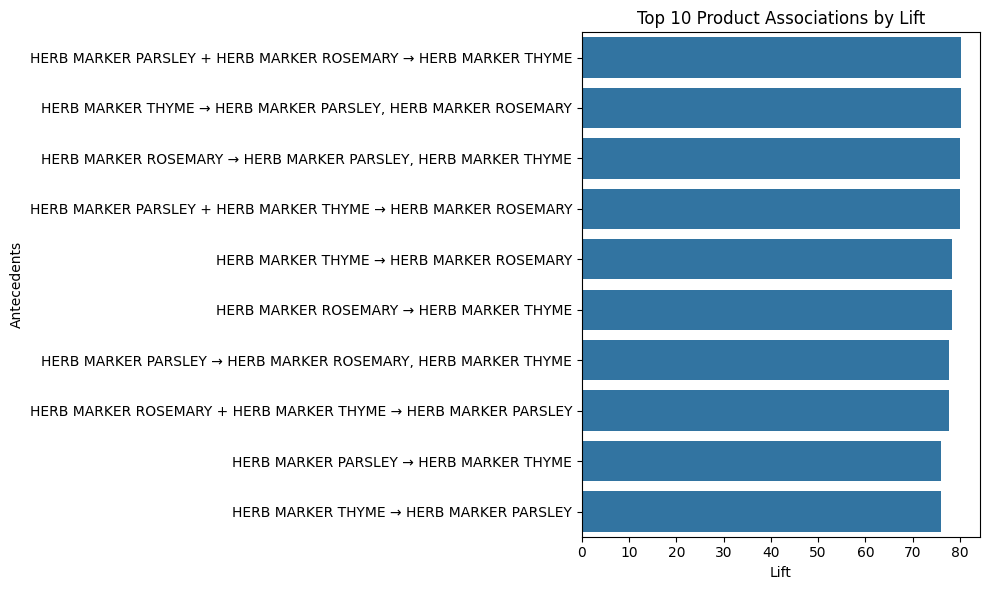

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

top_rules = rules.sort_values("lift", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_rules, x="lift", y=[" + ".join(str(i) for i in row["antecedents"]) + " → " + 
   ", ".join(str(i) for i in row["consequents"]) 
   for _, row in top_rules.iterrows()]
)
plt.title("Top 10 Product Associations by Lift")
plt.xlabel("Lift")
plt.ylabel("Antecedents")
plt.tight_layout()
plt.show()